# Exercise Set 6: Data Structuring 2

*Afternoon, August 14, 2019*

In this Exercise Set we will continue working with the weather data you downloaded and saved in Exercise Set 4. 

> **_Note_**: to solve the bonus exercises in this exerise set you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it tomorrow).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

First load in the required modules and set up the plotting library:

In [108]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Exercise Section 6.1: Weather, part 2

This section is the second part of three that analyzes NOAA data. The first part is Exercise Section 4.1, the last part is Exercise Section 7.2.

> **Ex. 6.1.1:** Load the CSV data you stored yesterday as part of Exercise Section 4.1. If you didn't manage to save the CSV file, you can use the code in [this gist](https://gist.github.com/Kristianuruplarsen/be3a14b226fc4c4d7b62c39de70307e4) to load in the NOAA data.

In [109]:
df = pd.read_csv("/Users/sebastianbaltser/Documents/GitHub/sds2019/material/session_4/weater_data.csv")
df.set_index('Unnamed: 0', inplace = True)
df['Date'] = pd.to_datetime(df['Date'].apply(str)) #Konverter til string og så til DateTime 
df

,Station identifier,Date,Observation type,Observation value,TMAX_F
Unnamed: 0,,,,,
221,ITE00100550,1864-08-09,TMAX,348,658.4
214,ITE00100550,1864-08-02,TMAX,346,654.8
220,ITE00100550,1864-08-08,TMAX,341,645.8
213,ITE00100550,1864-08-01,TMAX,335,635.0
217,ITE00100550,1864-08-05,TMAX,335,635.0
218,ITE00100550,1864-08-06,TMAX,331,627.8
202,ITE00100550,1864-07-21,TMAX,325,617.0
203,ITE00100550,1864-07-22,TMAX,321,609.8
222,ITE00100550,1864-08-10,TMAX,321,609.8


> **Ex. 6.1.2:** Convert the date formatted as string to  datetime. Make a new column with the month for each observation.

In [110]:
df['Month'] = df['Date'].dt.month
df

,Station identifier,Date,Observation type,Observation value,TMAX_F,Month
Unnamed: 0,,,,,,
221,ITE00100550,1864-08-09,TMAX,348,658.4,8
214,ITE00100550,1864-08-02,TMAX,346,654.8,8
220,ITE00100550,1864-08-08,TMAX,341,645.8,8
213,ITE00100550,1864-08-01,TMAX,335,635.0,8
217,ITE00100550,1864-08-05,TMAX,335,635.0,8
218,ITE00100550,1864-08-06,TMAX,331,627.8,8
202,ITE00100550,1864-07-21,TMAX,325,617.0,7
203,ITE00100550,1864-07-22,TMAX,321,609.8,7
222,ITE00100550,1864-08-10,TMAX,321,609.8,8


> **Ex. 6.1.3:** Set the datetime variable as temporal index and make a timeseries plot.

> _Hint:_ for this you need to know a few methods of the pandas DataFrames and pandas Series objects. Look up `.set_index()` and `.plot()`. 

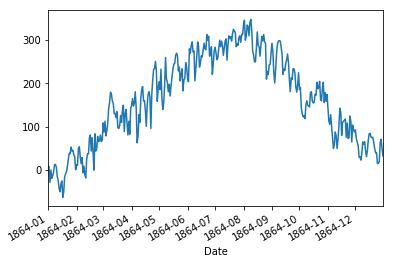

In [111]:
df.set_index('Date')['Observation value'].plot()

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module. 

In [112]:
import re
df['Country Code'] = df['Station identifier'].str.extract(r'([A-z]+)')

> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

In [113]:
def get_weather_data(year):
    df = pd.read_csv('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/%d.csv.gz' % year, header = None)
    df = df.drop([4,5,6,7], axis = 1) #Delete these columns
    df.columns = ['Station identifier', 'Date', 'Observation type', 'Observation value']
    
    conditions = (df['Observation type'] == 'TMAX') #Select only TMAX observations
    df = df[conditions].copy()
    df['Observation value'] = df['Observation value'] / 10 #For some reason
    df['TMAX_F'] = 32 + 1.8*df['Observation value'] #Add Fahrenheit
    df['Date'] = pd.to_datetime(df['Date'].apply(str)) #Convert to string and then DateTime
    df['Month'] = df['Date'].dt.month
    df['Country code'] = df['Station identifier'].str.extract(r'([A-z]+)') #Get country code with Regex
    
    df.reset_index(drop = True, inplace = True)
    
    return df

In [114]:
weather_data_1864 = get_weather_data(2018)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(20,20))
for cc in weather_data_1864['Country code'].unique():
    data = weather_data_1864[weather_data_1864['Country code'] == cc]
    ax.plot('Date', 'Observation value', data = data, label = cc)

ax.legend(title = 'Country code',
          bbox_to_anchor = (1.2, 0.9), borderpad=1, prop = {'size': 20})
plt.show()

##  Exercise Section 6.2: 

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 6.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint #1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint #2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [115]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header = None, 
                 skipinitialspace = True)

In [116]:
df.columns = ['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']

> **Ex. 6.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the  `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 6.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [117]:
#Missing value sign is questionmark
df.replace(regex = '^\\?$', value = np.nan, inplace = True)
df.dropna(axis = 0, how = 'any', inplace = True)

> **Ex. 6.2.3:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [118]:
df

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [145]:
count = df.groupby(['wage', 'sex'])['age'].count()
count

wage   sex   
<=50K  Female     8670
       Male      13984
>50K   Female     1112
       Male       6396
Name: age, dtype: int64

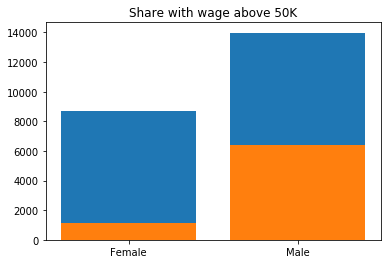

In [146]:
x = ['Female', 'Male']
fig, ax = plt.subplots(1,1)
ax.bar(x = x, height = count['<=50K'], label = '<=50K')
ax.bar(x = x, height = count['>50K'], label = '>50K')
ax.set(title = 'Share with wage above 50K')
plt.show()

In [130]:
female_total = count[:2].sum()
male_total = count[2:].sum()
female_share = count[1]/female_total
male_share = count[3]/male_total

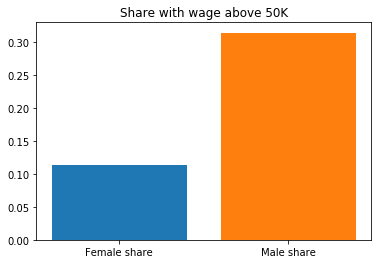

In [136]:
fig, ax = plt.subplots(1,1)
ax.bar(height = female_share, x = 'Female share')
ax.bar(height = male_share, x = 'Male share')
ax.set(title = 'Share with wage above 50K')
plt.show()

> **Ex. 6.2.4:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ the `.query()` method is extremely useful for filtering data.

In [ ]:
# [Answer to Ex. 6.2.4]